In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-49.52891708257289 164.40846354099625
-22.513482397937622 -70.10602191698251
-82.48303889898177 88.90689503001363
77.48348025112216 172.30419768280956
-11.498476896553058 95.91545001485866
6.457300754406418 44.00790261938988
-62.99019296081657 124.55467890077438
15.31052174255774 25.364322918605126
82.85774090717956 62.42002682574309
48.10202345551713 61.04554084544753
-52.31390749437961 117.5247217055524
-14.38300102670486 -111.64318634347015
-39.41731312645344 52.01763822486325
76.26914527036732 -77.1755242554865
-44.09137024187792 163.69164039373766
49.13072923986206 -177.11095946429563
-63.28477966722116 -17.94441499023003
15.874548687988636 42.405140568222606
-7.160652378419769 15.146427225322554
-61.23490540555713 116.81897985434807
46.74993748988413 -9.074036719955814
82.82556441874291 142.84291126563602
20.79237356512074 -124.04669278065522
-72.56294589756627 158.37637313399853
-75.33452580818607 -160.58890561417846
35.480170467942 -51.64634743154758
71.34948011592732 121.76828

-82.72381910733633 -137.75871308141532
-89.86080911880931 107.21034951458103
-4.936446569409611 24.34887030547631
-0.5614164539131536 -43.56983924049783
18.189601149380962 174.33799192229543
-64.43254487780138 66.50534321713047
14.467315753253175 -177.31248442179088
81.97683123600015 -69.81559759028524
-9.098177113433252 -62.214501746161886
71.98041961981448 74.8748616531166
-77.0704904147251 -93.52705539044183
-82.72565170028636 -49.984497228225194
7.509008440196439 -95.26857575340517
-56.714399146194935 143.21446828800396
6.04195556590021 36.98351391227493
57.78360436246683 64.65191947718964
64.61459366936583 -155.44107454697286
-26.274680290826673 66.95722460307263
84.75908087232952 116.14624565333611
-5.232268872537219 22.013565665702117
5.812959470679999 29.323331242053683
-5.285638857112616 173.89504394014267
34.68341849023027 -73.04346584598446
23.171647629004923 -50.862870765578236
-30.42628921436536 95.52126268455606
-71.38897816750544 139.86143598531038
-52.9817959887819 80.0

81.58567223938331 -117.88215450749392
17.007608384303722 15.646744193638625
-64.85959750078396 124.38364682898487
-52.89152905812652 97.06614146897601
25.57050298901099 -176.38269143476776
46.13895725847448 -133.24388028361358
-76.39525013049891 -96.03414082252668
-45.547295145511455 132.55263636000382
33.622176370782626 114.78768031569291
32.11218779025853 -75.59220790919656
71.8029621451098 -25.985543358357404
87.03048579450478 114.015473200624
-7.336271863712298 -19.327396190930017
43.624751666252166 -102.50257002186575
52.023946298339126 -14.798002155778534
-67.44791088000854 -167.15109828018115
-22.348748077337504 -137.69233087477977
-76.68222953330795 90.29063308352181
59.73265008373616 161.5307502504022
-61.978930112117 92.8021186261787
-7.071135476093204 -11.231995569057602
-35.407550158985195 -14.16610539896331
-55.54891392270755 -175.41726887335852
-64.58827393771595 55.277757270603956
0.7067676221397647 113.3968917982304
16.414684222144643 -143.55272160033113
81.889658177639

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
#Import requests and set URL
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | tocopilla
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | xuddur
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | jizan
Processing Record 18 of Set 1 | uige
Processing Record 19 of Set 1 | naron
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | ma

Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | moerai
Processing Record 41 of Set 4 | lovozero
Processing Record 42 of Set 4 | darhan
Processing Record 43 of Set 4 | binga
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | nizhniye vyazovyye
Processing Record 46 of Set 4 | kailua
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | rafaela
Processing Record 50 of Set 4 | hami
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | ardatov
Processing Record 4 of Set 5 | geresk
City not found. Skipping...
Processing Record 5 of Set 5 | catamarca
Processing Record 6 of Set 5 | artyk
City not found. Skipping...
Processing Record 7 of Set 5 | olafsvik
Processing Record 8 of Set 5 | namatanai
Processing Record 9 of Set 5 | tchibanga
Processing Record 10 of Set 5 | tazovskiy
Processing Record 11 of Set 5 | muncie
Processing Record 

Processing Record 30 of Set 8 | la asuncion
Processing Record 31 of Set 8 | bhilai
Processing Record 32 of Set 8 | solnechnyy
Processing Record 33 of Set 8 | shuangcheng
Processing Record 34 of Set 8 | souillac
Processing Record 35 of Set 8 | yumen
Processing Record 36 of Set 8 | alihe
Processing Record 37 of Set 8 | surt
Processing Record 38 of Set 8 | dawei
Processing Record 39 of Set 8 | kodinar
Processing Record 40 of Set 8 | strezhevoy
Processing Record 41 of Set 8 | saldanha
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | kamenka
Processing Record 44 of Set 8 | adrar
Processing Record 45 of Set 8 | mugur-aksy
Processing Record 46 of Set 8 | roebourne
Processing Record 47 of Set 8 | fukue
Processing Record 48 of Set 8 | scarborough
Processing Record 49 of Set 8 | kamaishi
Processing Record 50 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 1 of Set 9 | fujin
Processing Record 2 of Set 9 | emmaus
Processing Re

Processing Record 22 of Set 12 | huangzhai
Processing Record 23 of Set 12 | rapid valley
Processing Record 24 of Set 12 | ossora
Processing Record 25 of Set 12 | kapit
Processing Record 26 of Set 12 | robe
Processing Record 27 of Set 12 | cairns
Processing Record 28 of Set 12 | manuk mangkaw
Processing Record 29 of Set 12 | dire
Processing Record 30 of Set 12 | sheksna
Processing Record 31 of Set 12 | goma
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | bairiki
Processing Record 34 of Set 12 | khandyga
Processing Record 35 of Set 12 | dauriya
Processing Record 36 of Set 12 | zyryanka
Processing Record 37 of Set 12 | aracoiaba
Processing Record 38 of Set 12 | tuy hoa
Processing Record 39 of Set 12 | kisanga
Processing Record 40 of Set 12 | novikovo
Processing Record 41 of Set 12 | arlit
Processing Record 42 of Set 12 | la rioja
Processing Record 43 of Set 12 | ginda
Processing Record 44 of Set 12 | cartagena
Processing Record 45 of Set 12 | kavieng
Processing R

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,52.92,71,35,9.91,NZ,2022-07-03 01:36:39
1,Tocopilla,-22.0920,-70.1979,61.05,74,26,5.61,CL,2022-07-03 01:36:40
2,Busselton,-33.6500,115.3333,55.13,62,0,9.01,AU,2022-07-03 01:36:41
3,Pevek,69.7008,170.3133,32.02,98,100,8.57,RU,2022-07-03 01:36:42
4,Bengkulu,-3.8004,102.2655,80.65,71,78,0.92,ID,2022-07-03 01:36:42
5,Xuddur,4.1213,43.8894,68.23,80,100,23.60,SO,2022-07-03 01:36:43
6,Albany,42.6001,-73.9662,73.81,81,69,4.23,US,2022-07-03 01:36:36
7,Kutum,14.2000,24.6667,74.91,54,87,9.48,SD,2022-07-03 01:36:44
8,Rikitea,-23.1203,-134.9692,74.35,76,5,20.80,PF,2022-07-03 01:36:45
9,Qaanaaq,77.4840,-69.3632,37.27,99,100,5.99,GL,2022-07-03 01:36:45


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,2022-07-03 01:36:39,-46.1333,167.6833,52.92,71,35,9.91
1,Tocopilla,CL,2022-07-03 01:36:40,-22.0920,-70.1979,61.05,74,26,5.61
2,Busselton,AU,2022-07-03 01:36:41,-33.6500,115.3333,55.13,62,0,9.01
3,Pevek,RU,2022-07-03 01:36:42,69.7008,170.3133,32.02,98,100,8.57
4,Bengkulu,ID,2022-07-03 01:36:42,-3.8004,102.2655,80.65,71,78,0.92
5,Xuddur,SO,2022-07-03 01:36:43,4.1213,43.8894,68.23,80,100,23.60
6,Albany,US,2022-07-03 01:36:36,42.6001,-73.9662,73.81,81,69,4.23
7,Kutum,SD,2022-07-03 01:36:44,14.2000,24.6667,74.91,54,87,9.48
8,Rikitea,PF,2022-07-03 01:36:45,-23.1203,-134.9692,74.35,76,5,20.80
9,Qaanaaq,GL,2022-07-03 01:36:45,77.4840,-69.3632,37.27,99,100,5.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

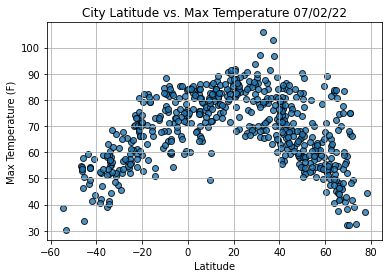

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

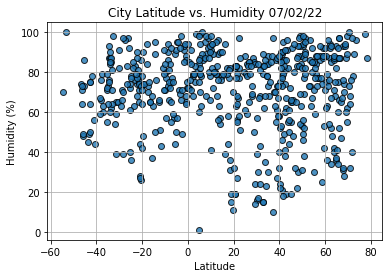

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

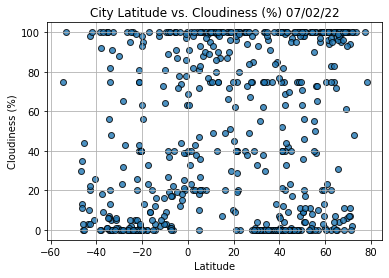

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

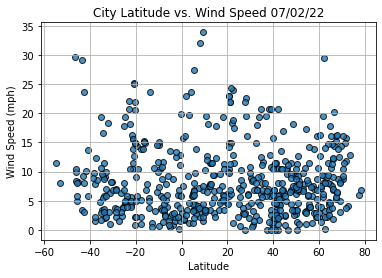

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()